<a href="https://colab.research.google.com/github/Majid5654/Erwan-Majid_PCVK_Ganjil_2025/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

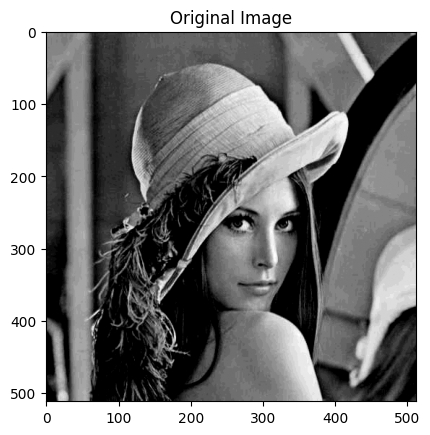

In [ ]:
img_path = '/content/drive/MyDrive/PCVK/lena_gs_lc2.jpg'
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

3. Manually create a Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO,
TOZERO_INV) according to the description from the chart shown above.

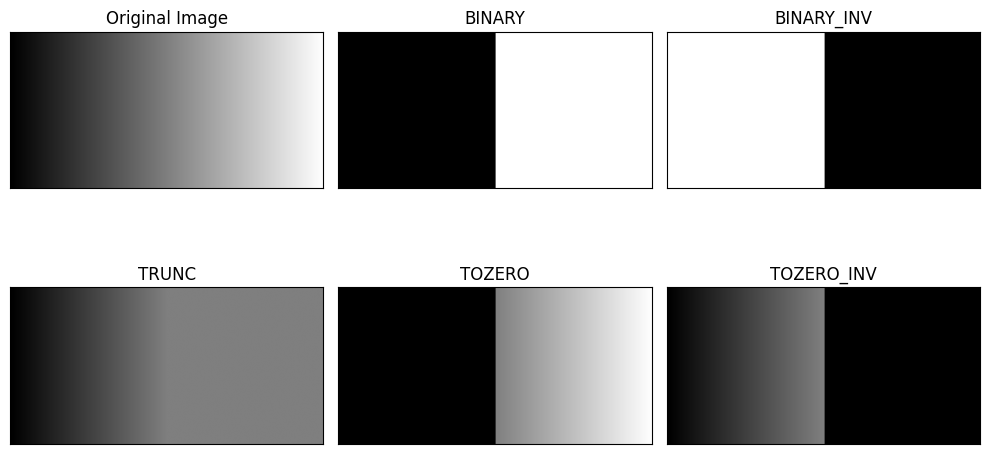

In [ ]:
gradient = np.linspace(0, 255, 512, dtype=np.uint8)
gradient_img = np.tile(gradient, (256, 1))

T = 127
maxVal = 255

binary = np.where(gradient_img > T, maxVal, 0).astype(np.uint8)
binary_inv = np.where(gradient_img > T, 0, maxVal).astype(np.uint8)
trunc = np.where(gradient_img > T, T, gradient_img).astype(np.uint8)
tozero = np.where(gradient_img > T, gradient_img, 0).astype(np.uint8)
tozero_inv = np.where(gradient_img > T, 0, gradient_img).astype(np.uint8)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gradient_img, binary, binary_inv, trunc, tozero, tozero_inv]

plt.figure(figsize=(10,6))
for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

4. Create Otsu Thresholding without using the Library. Also display the threshold value
when you use Otsu's, as shown in the following image . (use the
image lena_gs_lc2.jpg so that it really looks different between the otsu's results and
the usual global threshold)

Nilai threshold Otsu (manual): 92


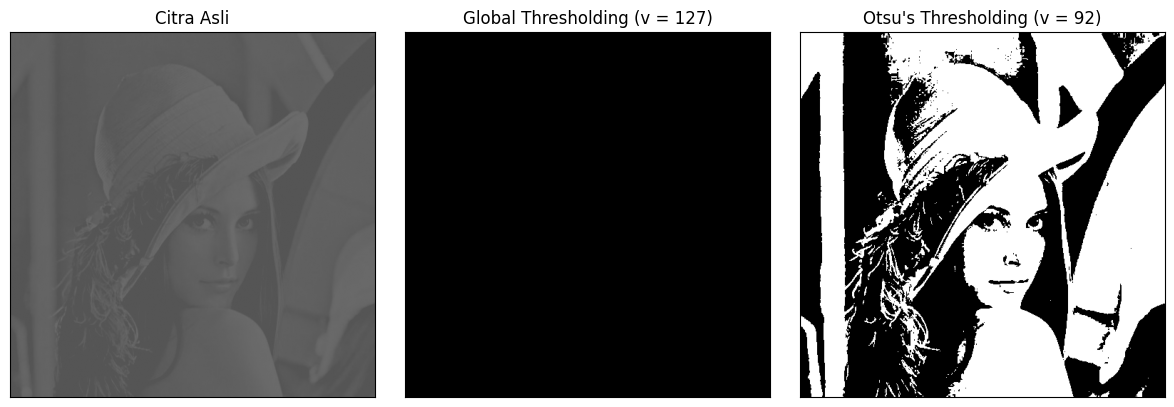

In [ ]:
hist, bins = np.histogram(img.ravel(), 256, [0, 256])
total = img.size

sum_total = np.dot(np.arange(256), hist)
sumB, wB, max_var, otsu_T = 0, 0, 0, 0

for t in range(256):
    wB += hist[t]
    if wB == 0:
        continue
    wF = total - wB
    if wF == 0:
        break
    sumB += t * hist[t]
    mB = sumB / wB
    mF = (sum_total - sumB) / wF
    var_between = wB * wF * (mB - mF) ** 2
    if var_between > max_var:
        max_var = var_between
        otsu_T = t

print(f"Nilai threshold Otsu (manual): {otsu_T}")

# 4. Thresholding global dan otsu manual
T_global = 127
_, th_global = cv.threshold(img, T_global, 255, cv.THRESH_BINARY)
th_otsu_manual = np.where(img > otsu_T, 255, 0).astype(np.uint8)


titles = [
    'Citra Asli',
    f'Global Thresholding (v = {T_global})',
    f"Otsu\'s Thresholding (v = {otsu_T})"
]
images = [img, th_global, th_otsu_manual]

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

5. Create a histogram from a segmented image, the histogram is only in the foreground
image. Use the Lily or Leaves image provided in the images folder .
Instructions:

In [22]:
img_path = '/content/drive/MyDrive/PCVK/lily.jpg'
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

Convert to grayscale & threshold untuk segmentasi sederhana

In [23]:
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gray_blur = cv.GaussianBlur(gray, (5, 5), 0)

 Otsu Threshold

In [24]:
_, mask = cv.threshold(gray_blur, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

In [25]:
kernel = np.ones((3,3), np.uint8)
mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel, iterations=2)
mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel, iterations=2)

citra hasil segmentasi

In [26]:
segmented = cv.bitwise_and(img, img, mask=mask)

Histogram seluruh citra

In [27]:
hist_full_r = cv.calcHist([img], [0], None, [256], [0, 256])
hist_full_g = cv.calcHist([img], [1], None, [256], [0, 256])
hist_full_b = cv.calcHist([img], [2], None, [256], [0, 256])

Histogram hanya foreground

In [28]:
hist_fg_r = cv.calcHist([img], [0], mask, [256], [0, 256])
hist_fg_g = cv.calcHist([img], [1], mask, [256], [0, 256])
hist_fg_b = cv.calcHist([img], [2], mask, [256], [0, 256])

Visualisasi hasil

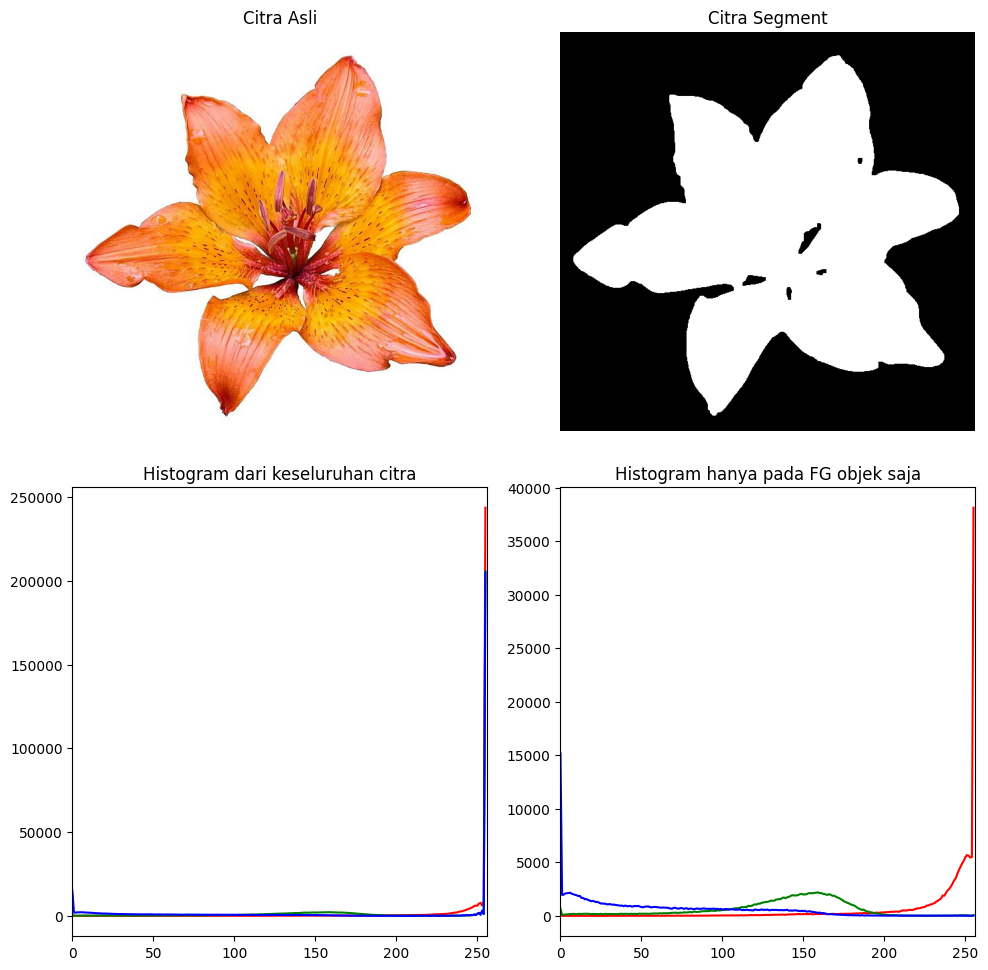

In [30]:
plt.figure(figsize=(10,10))

#citra asli & citra segmentasi
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment')
plt.axis('off')

#histogram keseluruhan & histogram FG
plt.subplot(2,2,3)
plt.plot(hist_full_r, color='r')
plt.plot(hist_full_g, color='g')
plt.plot(hist_full_b, color='b')
plt.title('Histogram dari keseluruhan citra')
plt.xlim([0,256])

plt.subplot(2,2,4)
plt.plot(hist_fg_r, color='r')
plt.plot(hist_fg_g, color='g')
plt.plot(hist_fg_b, color='b')
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0,256])

plt.tight_layout()
plt.show()

6. Perform color segmentation on the image "peppers.jpg", display only yellow
colors . (Hint: you can use K-Means to display only certain colors)

In [80]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/PCVK/peppers.jpg'
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Ubah jadi 2D untuk K-Means
Z = img.reshape((-1, 3))
Z = np.float32(Z)

# K-Means
K = 4
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv.kmeans(Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

print("Centroid warna (R,G,B):")
for i, c in enumerate(centers):
    print(f"Cluster {i}: {c}")

Centroid warna (R,G,B):
Cluster 0: [143  43  18]
Cluster 1: [250 206   4]
Cluster 2: [177 131  83]
Cluster 3: [252 250 248]


Centroid warna (R,G,B):
Cluster 0: [176 131  83]
Cluster 1: [143  43  19]
Cluster 2: [252 250 248]
Cluster 3: [250 206   4]


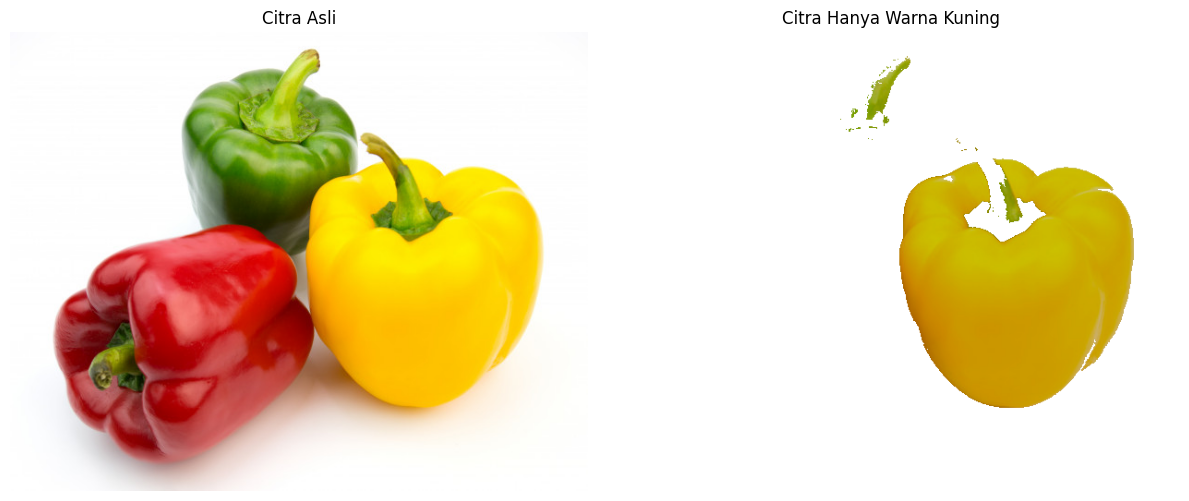

In [79]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/PCVK/peppers.jpg'
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Ubah jadi 2D untuk K-Means
Z = img.reshape((-1, 3))
Z = np.float32(Z)

# K-Means
K = 4
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv.kmeans(Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

print("Centroid warna (R,G,B):")
for i, c in enumerate(centers):
    print(f"Cluster {i}: {c}")

# Cluster kuning (Nilai cluster sesuai diatas)
cluster_yellow = 3

# Masking area kuning saja
mask = (labels.flatten() == cluster_yellow)

# Buat background putih
masked = np.ones_like(img, dtype=np.uint8) * 255
masked = masked.reshape((-1, 3))

# Mengambil warna asli
yellow_area = Z[mask] * 0.8
masked[mask] = yellow_area

# Mengembalikan ke bentuk gambar
masked = masked.reshape(img.shape).astype(np.uint8)

# Result
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(masked)
plt.title('Citra Hanya Warna Kuning')
plt.axis('off')

plt.tight_layout()
plt.show()


When you display a certain color, explain the problem you are facing and why it happened.

When displaying only the yellow color, the yellow object appeared almost invisible because its RGB values are very bright and close to white. This caused low contrast when displayed on a white background. The problem occurred due to the characteristics of the RGB color space and the way K-Means averages pixel colors. To solve this, the brightness of the yellow region was reduced, or a darker background was used to increase contrast.

7. Open the crossword.jpg file. With the knowledge of thresholding that you have
learned. Perform binary thresholding with the best results in your opinion. Copy the
code and image results in this module.

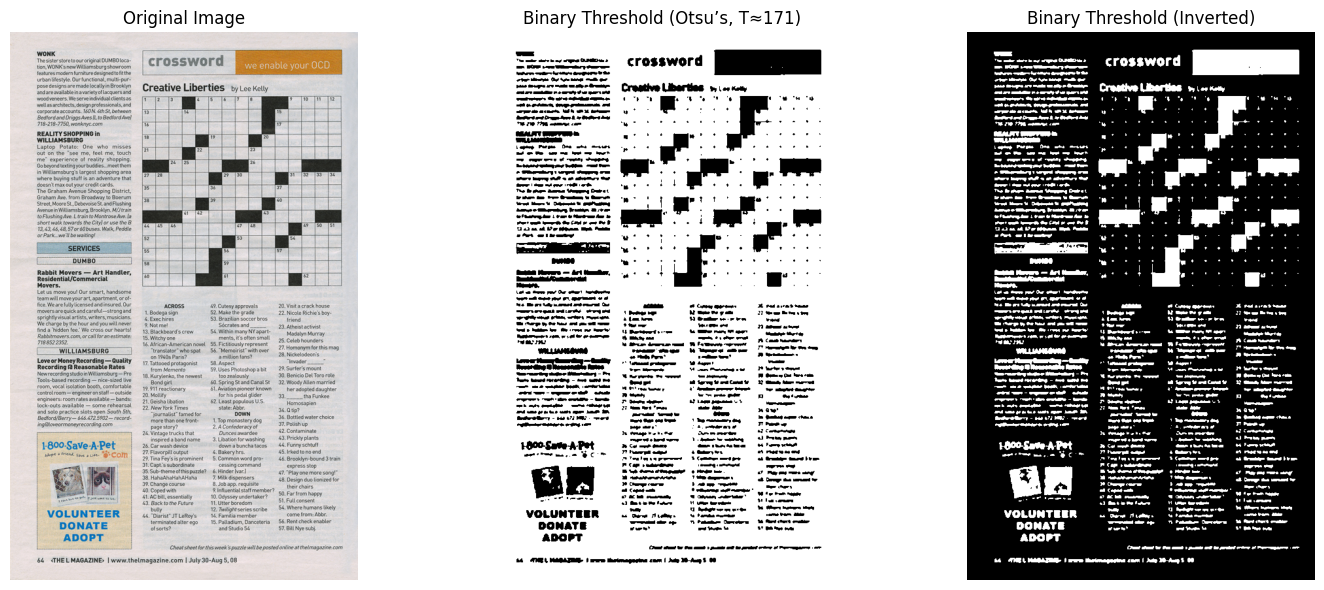

In [81]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/PCVK/crossword.jpg'  # sesuaikan path
img = cv.imread(img_path)

# Convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce text noise
blur = cv.GaussianBlur(gray, (5, 5), 0)

# Try Otsu’s Thresholding (auto threshold)
_, th_otsu = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Try BINARY_INV if you want black squares on white
_, th_inv = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Display results
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(th_otsu, cmap='gray')
plt.title(f"Binary Threshold (Otsu’s, T≈{_:.0f})")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(th_inv, cmap='gray')
plt.title('Binary Threshold (Inverted)')
plt.axis('off')

plt.tight_layout()
plt.show()


Thresholding is the process of converting a grayscale image into a binary image based on a specific threshold value. This process aims to separate objects from the background to make the shapes or patterns in the image clearer, such as in a crossword image that emphasizes black and white squares.